# Import software libraries and load the dataset #

In [1]:
# Import required libraries.
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.
shutil.rmtree('/home/jovyan/.keras')
shutil.copytree('/home/jovyan/work/.keras', '/home/jovyan/.keras')
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
#seed(1)
#tensorflow.random.set_seed(1)

Using TensorFlow backend.


Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3
- TensorFlow 2.0.0
- Keras 2.3.1

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
# Show dimensions of the training and testing sets and their labels

# Display dimensions of the training and testing sets
print('Training set dimensions:')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('\nTesting set dimensions:')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Training set dimensions:
X_train shape: (60000, 28, 28)
y_train shape: (60000,)

Testing set dimensions:
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Visualize the data examples

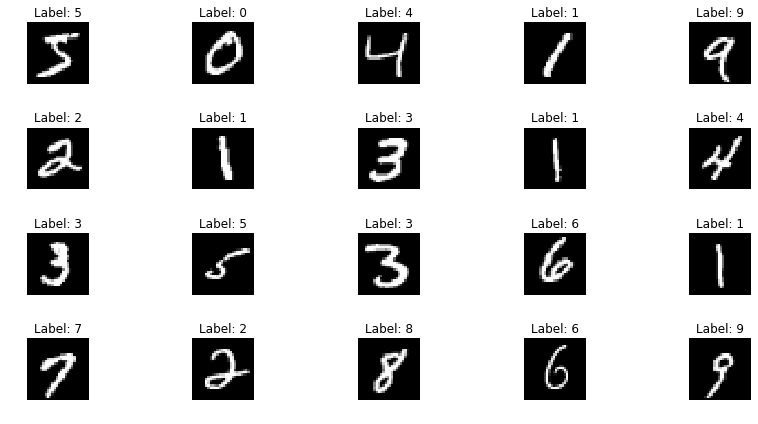

In [3]:
# Show a preview of the first 20 images

# Show a preview of the first 20 images
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Prepare the data for training with Keras

In [5]:
from keras.utils import to_categorical  # For one-hot encoding

# Reshape arrays to add greyscale flag
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the datasets

In [6]:
# Split the training and validation datasets and their labels.

from sklearn.model_selection import train_test_split

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display dimensions of the training, validation, and testing sets
print('Training set dimensions:')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('\nValidation set dimensions:')
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

print('\nTesting set dimensions:')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Training set dimensions:
X_train shape: (48000, 28, 28, 1)
y_train shape: (48000, 10)

Validation set dimensions:
X_val shape: (12000, 28, 28, 1)
y_val shape: (12000, 10)

Testing set dimensions:
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


# Build the CNN structure

In [ ]:
# Import the required libraries.


# Create the model.


# Add model layers as specified.


# Compile the model and summarize the layers

In [7]:
# Compile the model.
#   - Use the adam optimizer.
#   - Use categorical_crossentropy for the loss function.
#   - Use accuracy to measure model performance.

# Import required libraries.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the model.
model = keras.Sequential()

# Add model layers as specified.
model.add(layers.Input(shape=(28, 28, 1)))  # Input layer for MNIST images (28x28 pixels, greyscale)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Convolutional layer with 32 filters and ReLU activation
model.add(layers.MaxPooling2D((2, 2)))  # Max-pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Another convolutional layer with 64 filters and ReLU activation
model.add(layers.MaxPooling2D((2, 2)))  # Another max-pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Yet another convolutional layer with 64 filters and ReLU activation
model.add(layers.Flatten())  # Flatten layer to convert the 2D output to 1D
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units for classification (softmax activation)

# Print model summary
model.summary()


# Summarize the layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# Plot a graph of the model

In [8]:
# Install the required library.
!conda install --yes graphviz==2.40.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - graphviz==2.40.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       hbcca054_0         146 KB  conda-forge
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.10             |       h36c2ea0_0         112 KB  conda-forge


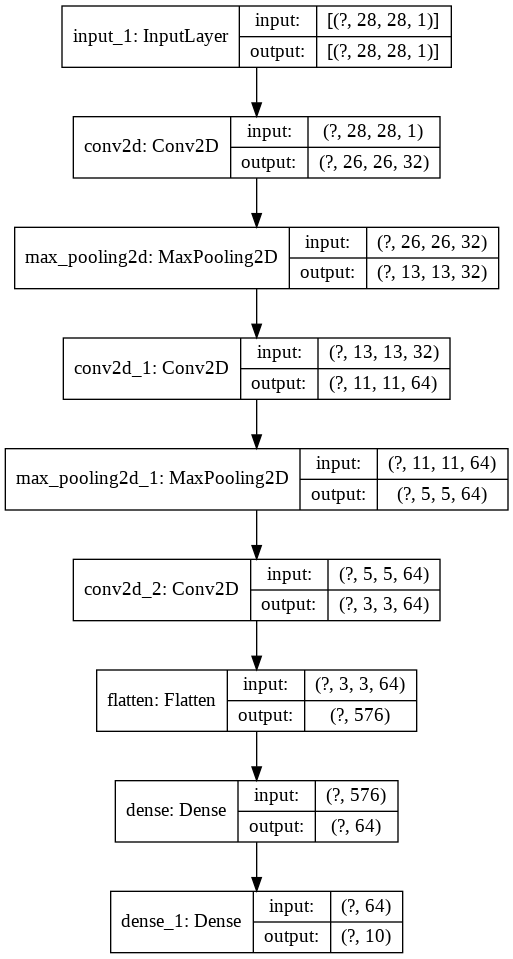

In [9]:
from tensorflow.keras.utils import plot_model

# Plot a graph of the model and save it to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the model

In [10]:
# Train the model over 1 epoch.

# Compile the model
model.compile(optimizer='adam',  # You can choose your preferred optimizer
              loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
              metrics=['accuracy'])  # Monitor accuracy during training

# Train the model for 1 epoch
history = model.fit(X_train, y_train,  # Training data and labels
                    epochs=1,           # Number of epochs (1 in this case)
                    batch_size=64,      # Batch size for training
                    validation_data=(X_val, y_val))  # Validation data and labels

# Print training history (loss and accuracy for each epoch)
print("Training loss:", history.history['loss'])
print("Training accuracy:", history.history['accuracy'])
print("Validation loss:", history.history['val_loss'])
print("Validation accuracy:", history.history['val_accuracy'])

Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 44s 921us/sample - loss: 1.1859 - accuracy: 0.5799 - val_loss: 0.4191 - val_accuracy: 0.8716
Training loss: [1.185888703664144]
Training accuracy: [0.57989585]
Validation loss: [0.4191189640363057]
Validation accuracy: [0.87158334]


# Evaluate the model on the test data

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10000/1 - 3s - loss: 0.3472 - accuracy: 0.8738
Test Loss: 0.4118614881157875
Test Accuracy: 0.8738


# Make predictions on the test data

In [12]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Show the first 30 examples
num_examples_to_show = 30
for i in range(num_examples_to_show):
    # Get the predicted class (index with the highest probability)
    predicted_class = np.argmax(predictions[i])
    
    # Print the predicted class and actual class
    print(f"Example {i + 1}: Predicted Class: {predicted_class}, Actual Class: {np.argmax(y_test[i])}")

Example 1: Predicted Class: 7, Actual Class: 7
Example 2: Predicted Class: 2, Actual Class: 2
Example 3: Predicted Class: 1, Actual Class: 1
Example 4: Predicted Class: 0, Actual Class: 0
Example 5: Predicted Class: 4, Actual Class: 4
Example 6: Predicted Class: 1, Actual Class: 1
Example 7: Predicted Class: 4, Actual Class: 4
Example 8: Predicted Class: 9, Actual Class: 9
Example 9: Predicted Class: 6, Actual Class: 5
Example 10: Predicted Class: 9, Actual Class: 9
Example 11: Predicted Class: 0, Actual Class: 0
Example 12: Predicted Class: 6, Actual Class: 6
Example 13: Predicted Class: 9, Actual Class: 9
Example 14: Predicted Class: 0, Actual Class: 0
Example 15: Predicted Class: 1, Actual Class: 1
Example 16: Predicted Class: 5, Actual Class: 5
Example 17: Predicted Class: 9, Actual Class: 9
Example 18: Predicted Class: 7, Actual Class: 7
Example 19: Predicted Class: 3, Actual Class: 3
Example 20: Predicted Class: 4, Actual Class: 4
Example 21: Predicted Class: 9, Actual Class: 9
E

# Visualize the predictions for 30 examples

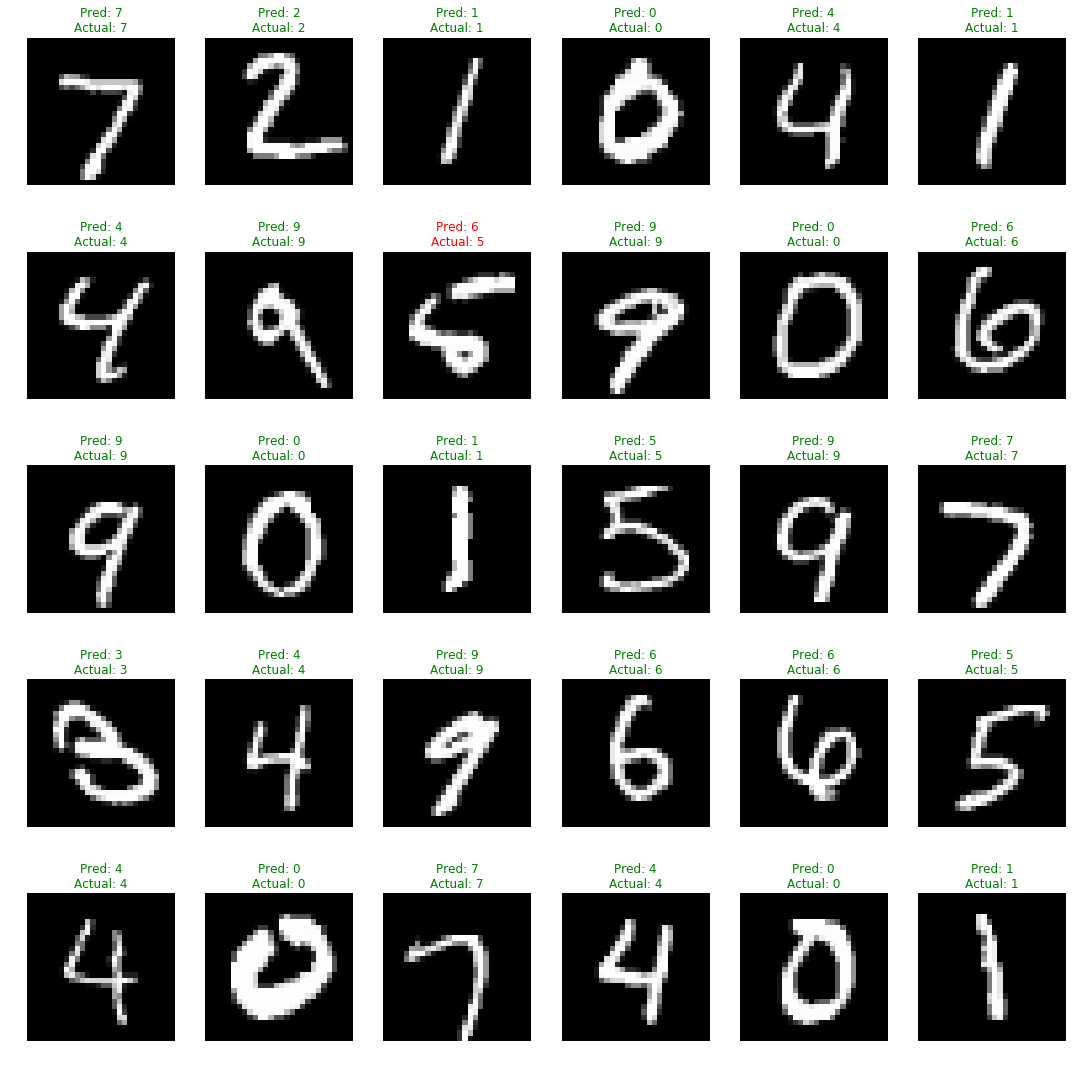

In [13]:
# Using the test set, show the first 30 predictions, highlighting any incorrect predictions in color.
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(X_test)

# Show the first 30 examples
num_examples_to_show = 30
plt.figure(figsize=(15, 15))

for i in range(num_examples_to_show):
    plt.subplot(5, 6, i + 1)
    
    # Get the predicted class (index with the highest probability)
    predicted_class = np.argmax(predictions[i])
    
    # Get the actual class
    actual_class = np.argmax(y_test[i])
    
    # Check if the prediction is correct
    is_correct = predicted_class == actual_class
    
    # Display the image with a colored label based on correctness
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_class}\nActual: {actual_class}', color='green' if is_correct else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()